In [706]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib notebook

In [707]:
def f(y, t, params):
    Ntot, Nqll = y      # unpack current values of y
    Vkin = params[0]
    Nstar = params[1]
    Nbar = params[2]
    SigmaI = params[3]
    Sigma0 = params[4]
    tweak = params[5]
    m = ((Nqll- (Nbar - Nstar))/(2*Nstar)+.001)**3; #print(m)
    #SigmaM = (SigmaI - m*Sigma0)/(1+m*Sigma0); #print(SigmaM)
    SigmaM = (SigmaI - m*Sigma0)/(1+m*Sigma0); #print(SigmaM)
    Nqllp = mydNqlldNtot(Ntot,Nstar,tweak)
    dNtotdt = SigmaM*Vkin
    dNqlldt = SigmaM*Vkin*Nqllp
    derivs = [dNtotdt, dNqlldt, SigmaM]
    return derivs

def mydNqlldNtot(Ntot,Nstar,tweak):
    phase1 = Ntot*2*np.pi
    phase2 = phase1-np.pi/2
    Nqllp = -2*np.pi*Nstar*np.cos(phase1) + tweak*2*np.sin(phase2)*np.cos(phase2)*2*np.pi
    return Nqllp

def myNqll(Ntot,Nbar,Nstar,tweak):
    phase1 = Ntot*2*np.pi
    phase2 = phase1-np.pi/2
    Nqll = Nbar - Nstar*np.sin(phase1) + tweak*np.sin(phase2)**2
    return Nqll

In [708]:
#parameters
Vkin = 0.2
Nbar = 1.0
Nstar = Nbar/2
SigmaI = 0.08
Sigma0 = 0.04
tweak = -0.25

#initial values
Nqll0 = Nbar
Ntot0 = 2

<IPython.core.display.Javascript object>


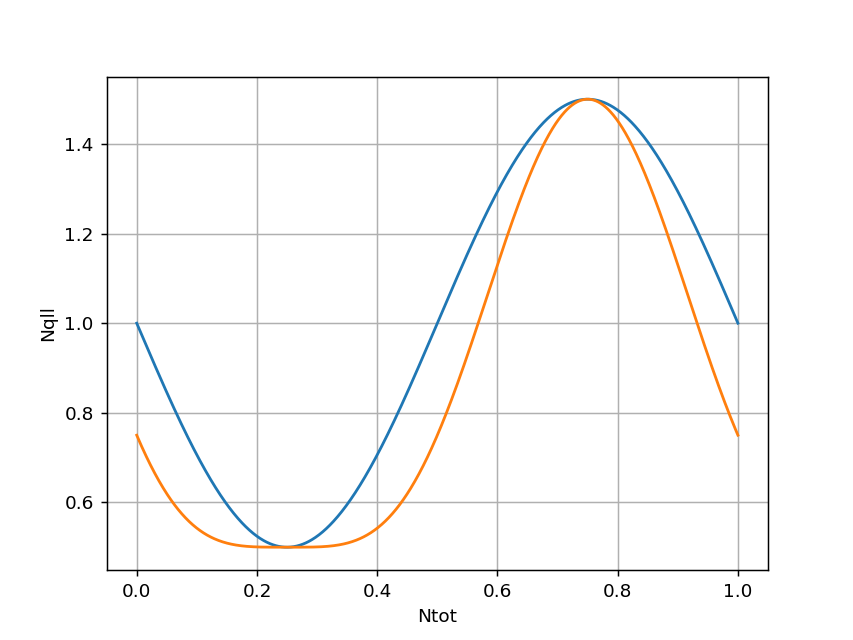

<IPython.core.display.Javascript object>


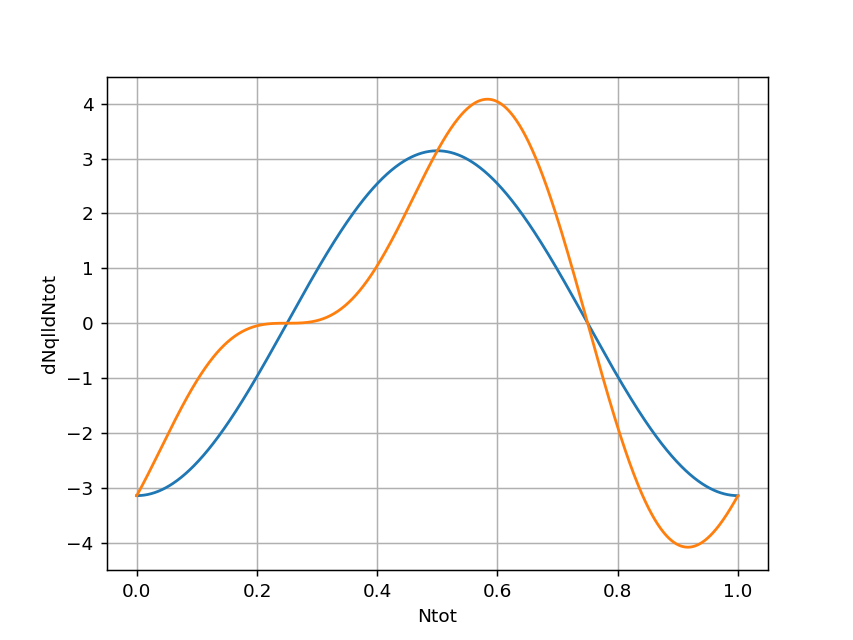

In [709]:
Ntotrange = np.linspace(0,1,1000)
plt.figure()
plt.plot(Ntotrange, myNqll(Ntotrange,Nbar,Nstar,0))
plt.plot(Ntotrange, myNqll(Ntotrange,Nbar,Nstar,tweak))
plt.xlabel('Ntot')
plt.ylabel('Nqll')
plt.grid('on')

plt.figure()
plt.plot(Ntotrange, mydNqlldNtot(Ntotrange,Nstar,0))
plt.plot(Ntotrange, mydNqlldNtot(Ntotrange,Nstar,tweak))
# top = np.diff(myNqll(Ntotrange,Nbar,Nstar,tweak))
# bot = np.diff(Ntotrange)
# plt.plot(Ntotrange[1:], top/bot)
plt.xlabel('Ntot')
plt.ylabel('dNqlldNtot')
plt.grid('on')

In [710]:
# Bundle parameters for ODE solver
params = [Vkin,Nstar, Nbar, SigmaI, Sigma0, tweak]

# Bundle initial conditions for ODE solver
y0 = [Ntot0, Nqll0]

# Make time array for solution
tStop = 1000.
tInc = .004
trange = np.arange(0., tStop, tInc)

In [711]:
Ntotn = Ntot0
Nqlln = Nqll0
y = [Ntotn, Nqlln]
Ntotsoln = np.zeros(len(trange))
Nqllsoln = np.zeros(len(trange))
SigmaMsoln = np.zeros(len(trange))
for i in range(len(trange)):
    dNtotdt, dNqlldt, SigmaM = f(y, 0, params)
    Ntotn, Nqlln = y
    Ntotnext = Ntotn + tInc*dNtotdt
    Nqllnext = Nqlln + tInc*dNqlldt
    Ntotsoln[i]=Ntotnext
    Nqllsoln[i]=Nqllnext
    SigmaMsoln[i]=SigmaM
    y = [Ntotnext, Nqllnext]

<IPython.core.display.Javascript object>


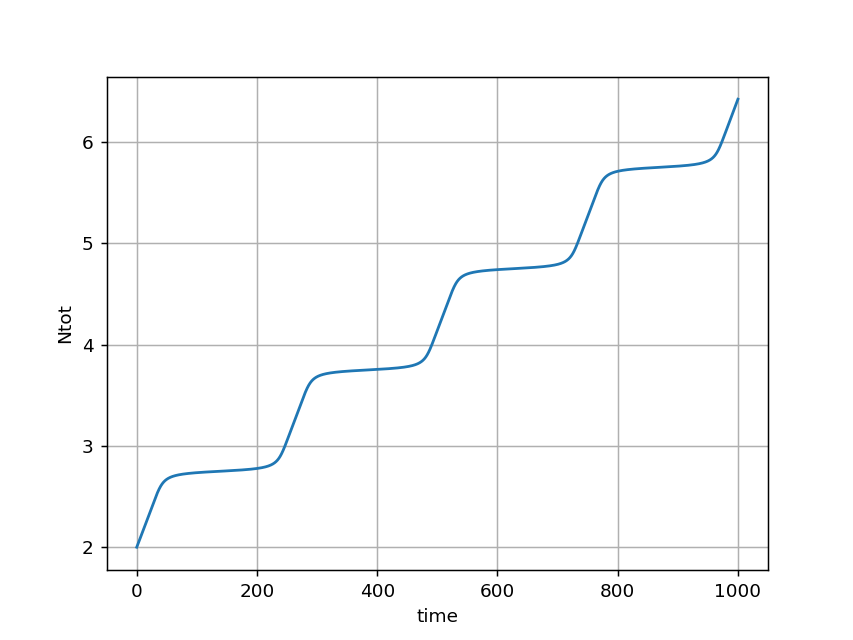

<IPython.core.display.Javascript object>


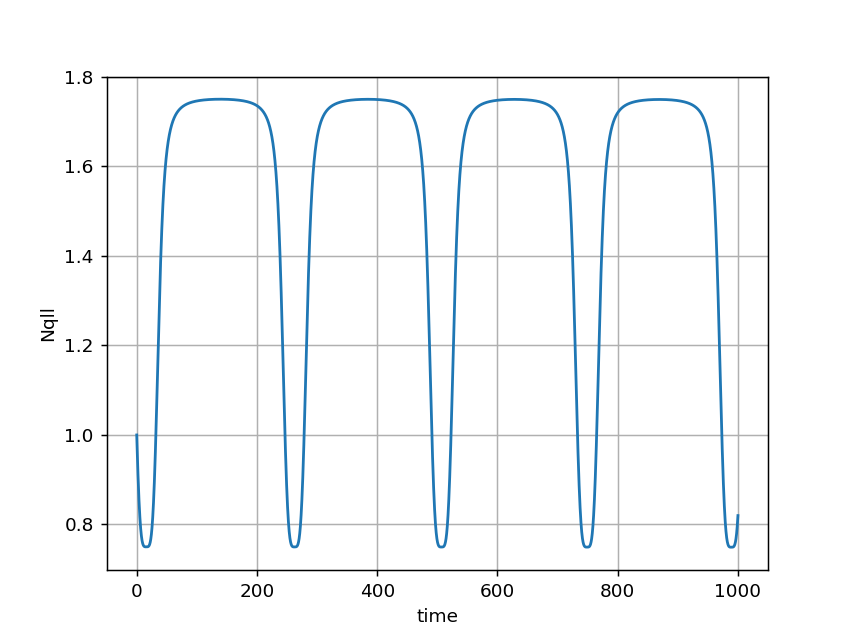

<IPython.core.display.Javascript object>


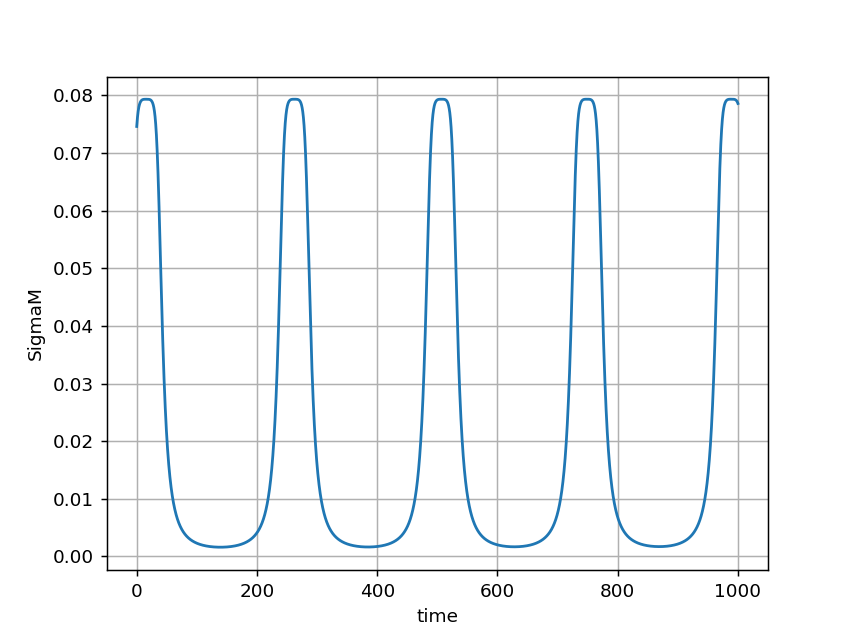

In [712]:
# Plot Ntot
plt.figure()
plt.plot(trange, Ntotsoln)
plt.xlabel('time')
plt.ylabel('Ntot')
plt.grid('on')

# Plot Nqll
plt.figure()
plt.plot(trange, Nqllsoln)
plt.xlabel('time')
plt.ylabel('Nqll')
plt.grid('on')

# Plot SigmaM
plt.figure()
plt.plot(trange, SigmaMsoln)
plt.xlabel('time')
plt.ylabel('SigmaM')
plt.grid('on')

In [713]:
# Find the "sticking coefficient" alpha
deltaNtot = Ntotsoln[-1]-Ntotsoln[0]
deltatime = tStop
observed_rate_of_growth = deltaNtot/deltatime
max_rate_of_growth = SigmaI*Vkin
alpha = observed_rate_of_growth/max_rate_of_growth
print (SigmaI*100,alpha)

8.0 0.276397120065
